## Week 1: Introduction

Instructor: Cornelia Ilin <br>
Email: cilin@ischool.berkeley.edu <br>

This notebook is intended to introduce you to running ipython notebook and to familiarize you with some basics of numpy, matplotlib, and sklearn, which you'll use extensively in this course. 

Read through the commands, try making changes, and make sure you understand how the plots below are generated.

In your projects, you should focus on making your code as organized and readable as possible. Use lots of comments -- see the code below -- !!

You should also familiarize yourself with the various keyboard shortcuts for moving between cells and running cells. Ctrl-ENTER runs a cell, while shift-ENTER runs a cell and advances focus to the next cell.

### Documentation

[1] Generate evenly spaced numbers: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html

[2] Python's lambda syntax: <br>
http://www.python-course.eu/lambda.php

[3] Return a sample from the standard Normal distribution: <br>
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randn.html#numpy.random.randn

[4] Sklearn documentation for linear regression: <br>
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[5] Sklearn documentation for the PolynomialFeatures preprocessor: <br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

### Step 1: Define classes

### Step 2: Define functions

### Step 3: Import packages

In [1]:
# standard 
import numpy as np

# plots
import matplotlib.pyplot as plt

# prediction
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# This tells matplolib not to try opening a new window for each plot
%matplotlib inline

### Step 4: Set working directories

### Step 5: Define global variables

In [2]:
# set a randomizer seeds (this will ensure the results are the same each time)
np.random.seed(100)

# set len(X)
len_X = 20

### Step 6: Read data

This time we will generate our own data (y, X), by using a random number generator.

generate X:

In [3]:
# generate evenly spaced X values in [0, 1]. Set len(X) = 20
X = np.linspace(0, 1, len_X)

In [4]:
print("Question 1: What is the data type of X?")
print(type(X))
print(X)

Question 1: What is the data type of X?
<class 'numpy.ndarray'>
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


generate y:

In [5]:
# create a "true" function (a piece of a cosine curve) that we will try to approximate with a model
true_function = lambda x: np.cos(1.5 * np.pi * x)

# try this function out. Notice that you can apply it to a scalar, an array, or you can use it even in pandas
print(true_function(0))
print(true_function(0.5))
print(true_function(np.array([0, 0.5])))

1.0
-0.7071067811865475
[ 1.         -0.70710678]


In [6]:
# generate true y values
y = true_function(X)

# print the values of y to the nearest hundredth
print (['%.2f' %i for i in y])

['1.00', '0.97', '0.88', '0.74', '0.55', '0.32', '0.08', '-0.16', '-0.40', '-0.61', '-0.79', '-0.92', '-0.99', '-1.00', '-0.95', '-0.84', '-0.68', '-0.48', '-0.25', '-0.00']


In [7]:
# add random noise to y
# the randn function samples random numbers from the standard Normal distribution
# multiplying adjusts the standard deviation of the distribution
noise = np.random.randn(len_X) * 0.2
y += noise

# print the noise-added values of y for comparison.
print (['%.2f' %i for i in y])

['0.65', '1.04', '1.11', '0.69', '0.74', '0.43', '0.13', '-0.38', '-0.44', '-0.56', '-0.88', '-0.83', '-1.10', '-0.83', '-0.81', '-0.86', '-0.78', '-0.27', '-0.33', '-0.22']


Next, we want to predict y, using the feature vector X. 

In this course, our outputs (y) will always be 1-dimensional. Our inputs (X) will usually have more than 1 dimension. Today, for simplicity, we have just a single feature. 

Since the machine learning classes in sklearn expect input feature vectors, we need to turn each input x in X into a feature vector [x].

### Step 7: Clean data

In [8]:
# transform X into a vector (an alternative command is X = np.transpose(X))
X = X[:, np.newaxis]
print(X)

[[0.        ]
 [0.05263158]
 [0.10526316]
 [0.15789474]
 [0.21052632]
 [0.26315789]
 [0.31578947]
 [0.36842105]
 [0.42105263]
 [0.47368421]
 [0.52631579]
 [0.57894737]
 [0.63157895]
 [0.68421053]
 [0.73684211]
 [0.78947368]
 [0.84210526]
 [0.89473684]
 [0.94736842]
 [1.        ]]


### Step 8: Analysis (model fit)

###### Linear model

In [9]:
# model fit
lm = LinearRegression(fit_intercept = True)
lm.fit(X, y)
lm_yhat = lm.predict(X)
print(lm.intercept_)
print(lm.coef_)
print ('Estimated function: y = %.2f + %.2fx' %(lm.intercept_, lm.coef_[0]))
print('Predicted values:')
print(lm_yhat)

0.6829479574455164
[-1.71849162]
Estimated function: y = 0.68 + -1.72x
Predicted values:
[ 0.68294796  0.59250103  0.5020541   0.41160718  0.32116025  0.23071332
  0.14026639  0.04981947 -0.04062746 -0.13107439 -0.22152132 -0.31196824
 -0.40241517 -0.4928621  -0.58330903 -0.67375595 -0.76420288 -0.85464981
 -0.94509674 -1.03554366]


Approximating a cosine function with a linear model doesn't work so well. By adding polynomial transformations of our feature(s), we can fit more complex functions. This is often called polynomial (nonlinear) regression. 

###### Nonlinear model (poly degree==4)

In [10]:
# create polinomial transformations
poly = PolynomialFeatures(degree=4, include_bias=False)
X4 = poly.fit_transform(X)
print(X4)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.26315789e-02 2.77008310e-03 1.45793847e-04 7.67336039e-06]
 [1.05263158e-01 1.10803324e-02 1.16635078e-03 1.22773766e-04]
 [1.57894737e-01 2.49307479e-02 3.93643388e-03 6.21542192e-04]
 [2.10526316e-01 4.43213296e-02 9.33080624e-03 1.96438026e-03]
 [2.63157895e-01 6.92520776e-02 1.82242309e-02 4.79585025e-03]
 [3.15789474e-01 9.97229917e-02 3.14914711e-02 9.94467507e-03]
 [3.68421053e-01 1.35734072e-01 5.00072897e-02 1.84237383e-02]
 [4.21052632e-01 1.77285319e-01 7.46464499e-02 3.14300842e-02]
 [4.73684211e-01 2.24376731e-01 1.06283715e-01 5.03449175e-02]
 [5.26315789e-01 2.77008310e-01 1.45793847e-01 7.67336039e-02]
 [5.78947368e-01 3.35180055e-01 1.94051611e-01 1.12345670e-01]
 [6.31578947e-01 3.98891967e-01 2.51931768e-01 1.59114801e-01]
 [6.84210526e-01 4.68144044e-01 3.20309083e-01 2.19158846e-01]
 [7.36842105e-01 5.42936288e-01 4.00058318e-01 2.94779813e-01]
 [7.89473684e-01 6.23268698e-01 4.92054235e-01 3.884638

In [11]:
# model fit
lm4 = LinearRegression(fit_intercept=True)
lm4.fit(X4, y)
lm4_yhat = lm4.predict(X4)
print(lm4.intercept_)
print(lm4.coef_)
print ('Estimated function: y = %.2f + %.2fx + %.2fx^2 + %.2fx^3 + %.2fx^4' %(lm4.intercept_, lm4.coef_[0], lm4.coef_[1], lm4.coef_[2], lm4.coef_[3]))
print('Predicted values:')
print(lm4_yhat)

0.7319147255143954
[  6.24224927 -43.25265643  63.12320008 -27.06979253]
Estimated function: y = 0.73 + 6.24x + -43.25x^2 + 63.12x^3 + -27.07x^4
Predicted values:
[ 0.73191473  0.94963597  0.98004012  0.87086724  0.66487221  0.39982469
  0.10850918 -0.18127503 -0.44671383 -0.6699783  -0.83822472 -0.94359456
 -0.98321447 -0.95919629 -0.87863706 -0.75361902 -0.60120958 -0.44346134
 -0.30741211 -0.22508487]


###### Nonlinear model (poly degree==15)

In [12]:
# create polinomial transformations
poly = PolynomialFeatures(degree=15, include_bias=False)
X15 = poly.fit_transform(X)
print(X15[0:3])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.26315789e-02 2.77008310e-03 1.45793847e-04 7.67336039e-06
  4.03861073e-07 2.12558460e-08 1.11872874e-09 5.88804597e-11
  3.09897157e-12 1.63103767e-13 8.58440877e-15 4.51810988e-16
  2.37795257e-17 1.25155398e-18 6.58712623e-20]
 [1.05263158e-01 1.10803324e-02 1.16635078e-03 1.22773766e-04
  1.29235543e-05 1.36037414e-06 1.43197278e-07 1.50733977e-08
  1.58667344e-09 1.67018257e-10 1.75808692e-11 1.85061781e-12
  1.94801874e-13 2.05054605e-14 2.15846952e-15]]


In [13]:
# model fit
lm15 = LinearRegression(fit_intercept=True)
lm15.fit(X15, y)
lm15_yhat = lm15.predict(X15)
print(lm15.intercept_)
print(lm15.coef_)
print('Predicted values:')
print(lm15_yhat)

0.6500300527539413
[-1.93219800e+02  1.03883326e+04 -2.16189952e+05  2.46460166e+06
 -1.77205791e+07  8.65952871e+07 -3.00453444e+08  7.58866070e+08
 -1.41127741e+09  1.93203440e+09 -1.92296034e+09  1.35259700e+09
 -6.36783600e+08  1.79874544e+08 -2.30305366e+07]
Predicted values:
[ 0.65003005  1.03820969  1.10811332  0.69391923  0.71719695  0.48279606
  0.04359599 -0.29563981 -0.47568607 -0.60494338 -0.77420562 -0.95263518
 -1.00626155 -0.8878077  -0.78891069 -0.86450874 -0.78232214 -0.27012069
 -0.33311283 -0.22366323]


### Step 9: Plots

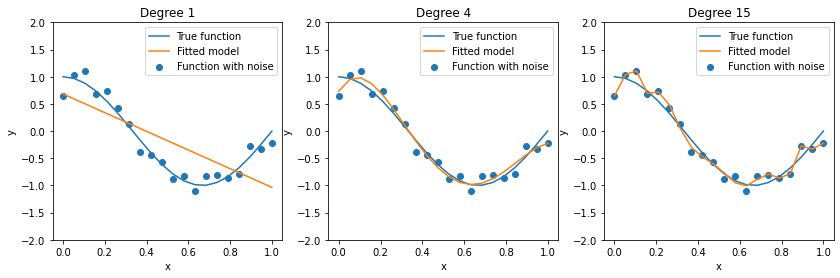

In [14]:
degrees = [1, 4, 15]

# Initialize a new plot and set plot size
plt.figure(figsize=(14, 4)) 

for i in range(len(degrees)):
    # create sublots that are all on the same row
    ax = plt.subplot(1, len(degrees), i+1)
    
    # create the polynomial feature vector (or matrix)
    poly = PolynomialFeatures(degree = degrees[i], include_bias = False)
    temp_X = poly.fit_transform(X)
    
    # model fit
    lm = LinearRegression()
    lm.fit(temp_X, y)
    lm_yhat = lm.predict(temp_X)

    # plot the true function
    plt.plot(X, true_function(X), label="True function");

    # plot the true function with noise added
    plt.scatter(X, y, label="Function with noise");

    # Show the fitted function for the linear model
    plt.plot(X, lm_yhat, label="Fitted model");

    # Add labels, title, legend to the plot
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((-.05, 1.05))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree %d" %degrees[i])

### Conclusions

The machine learning lesson here is that we are interested in the smallest model that fits our data the best. Clearly, the degree 1 model, while very small (only 2 parameters), doesn't fit the observed data well. The degree 15 model fits the observed data extremely well, but is unlikely to generalize to new data. This is a case of "over-fitting", which often happens when we try to estimate too many parameters from just a few examples. The degree 4 model appears to be a good blend of small model size and good generalization.